part 1
## Understanding problem statement

TechWorks Consulting aims to standardize the employee salary decision using machine learning. Predicting salaries with a data-driven model helps ensure fair compensation and consistent hiring practices.
I will create a regression model to predict salaries based on prior experience, education, location, past compensation, and more given attributes.

Part 2)
## Data Exploration and loading
We are given data in 3 different tables . The first table Employee contain most of the employee data including college name, city name, previous CTC, previous job change, graduation marks,Experience months, CTC. The second table college has devided college based on tiers. and similiarly third table cities has cities devided into nmetro and non metro cities.
So to prepare the data I have first unpivoted tables city and College using powerQuery to get Table1 and Table2 respectively . Table 1 has two columns namely city and city type of that city , similiarly table 2 has 2 columns college and its tier.
Then we combined Table1 and Table 2 into main Employee table using lookups to get City type and College Tier in every row for each employee.
Then we finally load our processed Employee table named ML case Study_new.xlsx to our notebook using pandas library.

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import seaborn as sns

In [5]:
df1=pd.read_excel("ML case Study_ new.xlsx")

In [6]:
df1.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,City_type,college_category
0,SVNIT Surat,Asansol,Manager,55523,3,66,19,71406.58,non-metro cities,Tier 2
1,NIT Bhopal,Ajmer,Executive,57081,1,84,18,68005.87,non-metro cities,Tier 2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347,2,52,28,76764.02,non-metro cities,Tier 3
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010,2,81,33,82092.39,non-metro cities,Tier 3
4,DTU,Durgapur,Executive,57879,4,74,32,73878.10,non-metro cities,Tier 1


Part 3 
##  Data Cleaning & Preprocessing
- Here we looked for missing variable from dataframe.info() and dataframe.describe() and if finf any missing we will treat it using isnull
- Converted categorial variable to numerical
- Handled outliers

In [7]:
df1.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   int64  
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
 8   City_type            1589 non-null   object 
 9   college_category     1589 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 124.3+ KB


1)this data doesnot has missing values as all the independent variables have same 1589 entries


2)Handling outliers

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'X', 'Y'
  cset = contour_func(


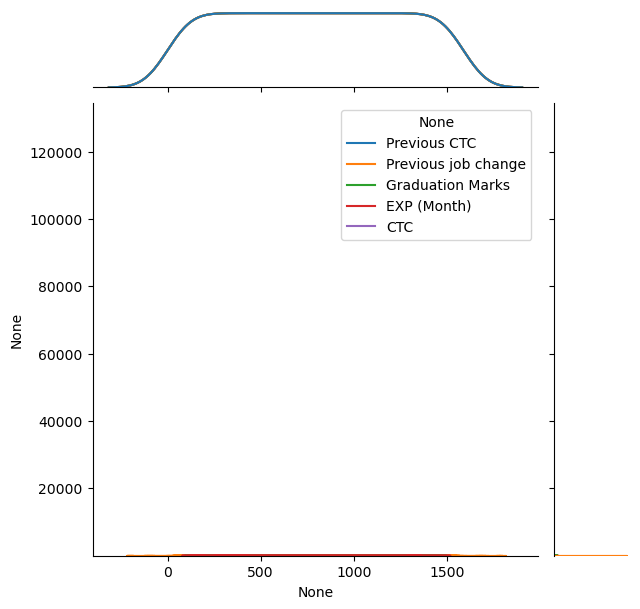

In [9]:
sns.jointplot(X="Graduation Marks", Y="CTC" ,data= df1,kind="kde") 

In [10]:
np.percentile(df1["Previous CTC"], [99])

array([71506.92])

In [11]:
max_prev_ctc=np.percentile(df1["Previous CTC"], [99])[0]

In [12]:
df1["Previous CTC"][(df1["Previous CTC"]>max_prev_ctc)]=max_prev_ctc

C:\Users\11apo\AppData\Local\Temp\ipykernel_9252\596381754.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["Previous CTC"][(df1["Previous CTC"]>max_prev_ctc)]=max_prev_ctc
C:\Users\11apo\AppData\Local\Temp\ipykernel_9252\596381754.py

In [14]:
min_prev_ctc=np.percentile(df1["Previous CTC"], [1])[0]

In [15]:
df1["Previous CTC"][(df1["Previous CTC"]<min_prev_ctc)]=min_prev_ctc

In [16]:
df1.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55509.647854,2.528634,59.855255,39.044682,75353.278798
std,6547.642460,1.123918,14.935139,14.108875,12587.288237
min,41587.920000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,71506.920000,4.000000,85.000000,64.000000,123416.990000


Since we have replaced the values of Previous CTC that were greater than 99th percentile value with 99th percentile value we have removed the outliers


3)Handling categorical variables


In [53]:
pd.get_dummies(df1)

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,College_Amity University,"College_Amrita University, Coimbatore",College_BIT Mesra,College_BITS Pilani (Goa Campus),College_BITS Pilani (Hyderabad Campus),...,City_Rajpur Sonarpur,City_Rourkela,City_Surat,Role_Executive,Role_Manager,City_type_Metrio City,City_type_non-metro cities,college_category_Tier 1,college_category_Tier 2,college_category_Tier 3
0,55523.0,3,66,19,71406.58,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,57081.0,1,84,18,68005.87,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
2,60347.0,2,52,28,76764.02,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,True
3,49010.0,2,81,33,82092.39,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
4,57879.0,4,74,32,73878.10,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,61285.0,3,44,60,77283.59,False,False,False,True,False,...,False,False,True,True,False,True,False,True,False,False
1585,63140.0,1,44,24,68416.86,False,False,False,False,False,...,True,False,False,True,False,False,True,True,False,False
1586,44907.0,1,60,19,70186.19,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
1587,52054.0,2,67,29,73394.09,False,False,False,False,False,...,False,False,False,True,False,False,True,True,False,False


prefix = 'College_'
dummy_cols = [col for col in df1_dummies.columns if col.startswith(prefix)]

# Step 2: Recreate the original column
df1_dummies['College'] = df1_dummies[dummy_cols].idxmax(axis=1).str.replace(prefix, '', regex=False)

# Step 3: Drop dummy columns
df1_restored = df1_dummies.drop(columns=dummy_cols)

print(df1_restored)


In [17]:
cols_to_encode = ['Role', 'City_type','college_category']

# Get dummies only for selected columns
dummies = pd.get_dummies(df1[cols_to_encode], drop_first=False)

# Drop original categorical columns and concat dummy columns
df1_encoded = pd.concat([df1.drop(cols_to_encode, axis=1), dummies], axis=1)

print(df1_encoded)

                          College             City  Previous CTC  \
0                     SVNIT Surat          Asansol       55523.0   
1                      NIT Bhopal            Ajmer       57081.0   
2                    IEM, Kolkata  Rajpur Sonarpur       60347.0   
3               KIIT, Bhubaneswar            Ajmer       49010.0   
4                             DTU         Durgapur       57879.0   
...                           ...              ...           ...   
1584     BITS Pilani (Goa Campus)            Surat       61285.0   
1585                 NIT Warangal  Rajpur Sonarpur       63140.0   
1586    NIT Tiruchipally (Trichy)        Ahmedabad       44907.0   
1587               IIIT Hyderabad         Durgapur       52054.0   
1588  R.V. College of Engineering            Delhi       44353.0   

      Previous job change  Graduation Marks  EXP (Month)       CTC  \
0                       3                66           19  71406.58   
1                       1                84

In [18]:
df1_encoded.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager,City_type_Metrio City,City_type_non-metro cities,college_category_Tier 1,college_category_Tier 2,college_category_Tier 3
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,False,True,False,True,False,True,False
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,True,False,False,True,False,True,False
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,True,False,False,True,False,False,True
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,True,False,False,True,False,False,True
4,DTU,Durgapur,57879.0,4,74,32,73878.10,True,False,False,True,True,False,False


In [19]:
del df1_encoded['Role_Manager']

In [20]:
del df1_encoded['City_type_non-metro cities']

In [21]:
del df1_encoded['college_category_Tier 3']

In [22]:
df1_encoded.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,City_type_Metrio City,college_category_Tier 1,college_category_Tier 2
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,False,False,False,True
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,True,False,False,True
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,True,False,False,False
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,True,False,False,False
4,DTU,Durgapur,57879.0,4,74,32,73878.10,True,False,True,False


In [27]:
del df1_encoded['College']

In [28]:
del df1_encoded['City']

In [29]:
df1_encoded.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,City_type_Metrio City,college_category_Tier 1,college_category_Tier 2
0,55523.0,3,66,19,71406.58,False,False,False,True
1,57081.0,1,84,18,68005.87,True,False,False,True
2,60347.0,2,52,28,76764.02,True,False,False,False
3,49010.0,2,81,33,82092.39,True,False,False,False
4,57879.0,4,74,32,73878.10,True,False,True,False


Part 4
## Feature Engineering and Splitting
here I have done following two steps
-Normalization: Scaling the values of different features to the same range so that one feature does not dominate the others
-Feature selection: Choosing a subset of the most important features to use as inputs to the regression model.

4)Normalization: Scaling the values of different features to the same range so that one feature does not dominate the others

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1_encoded)


In [26]:
df1_encoded.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,City_type_Metrio City,college_category_Tier 1,college_category_Tier 2
0,SVNIT Surat,Asansol,55523.0,3,66,19,71406.58,False,False,False,True
1,NIT Bhopal,Ajmer,57081.0,1,84,18,68005.87,True,False,False,True
2,"IEM, Kolkata",Rajpur Sonarpur,60347.0,2,52,28,76764.02,True,False,False,False
3,"KIIT, Bhubaneswar",Ajmer,49010.0,2,81,33,82092.39,True,False,False,False
4,DTU,Durgapur,57879.0,4,74,32,73878.10,True,False,True,False


In [31]:
scaled_data.head() 


AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [32]:
scaled_df = pd.DataFrame(scaled_data, columns=df1_encoded.columns)

In [33]:
scaled_df.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,City_type_Metrio City,college_category_Tier 1,college_category_Tier 2
0,0.002040,0.419527,0.411558,-1.421162,-0.313645,-1.960743,-1.028732,-0.756116,1.538352
1,0.240063,-1.360523,1.617149,-1.492061,-0.583900,0.510011,-1.028732,-0.756116,1.538352
2,0.739026,-0.470498,-0.526124,-0.783065,0.112112,0.510011,-1.028732,-0.756116,-0.650046
3,-0.992982,-0.470498,1.416217,-0.428566,0.535559,0.510011,-1.028732,-0.756116,-0.650046
4,0.361977,1.309552,0.947376,-0.499466,-0.117233,0.510011,-1.028732,1.322549,-0.650046


In [35]:
x_multi= scaled_df.drop("CTC", axis=1)

In [36]:
y_multi = scaled_df.CTC

In [37]:
x_multi.head()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,City_type_Metrio City,college_category_Tier 1,college_category_Tier 2
0,0.002040,0.419527,0.411558,-1.421162,-1.960743,-1.028732,-0.756116,1.538352
1,0.240063,-1.360523,1.617149,-1.492061,0.510011,-1.028732,-0.756116,1.538352
2,0.739026,-0.470498,-0.526124,-0.783065,0.510011,-1.028732,-0.756116,-0.650046
3,-0.992982,-0.470498,1.416217,-0.428566,0.510011,-1.028732,-0.756116,-0.650046
4,0.361977,1.309552,0.947376,-0.499466,0.510011,-1.028732,1.322549,-0.650046


In [38]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso(alpha=0.1)
lasso.fit(x_multi, y_multi)

# Get non-zero coefficient features
selected_features = x_multi.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['Previous CTC', 'EXP (Month)', 'Role_Executive'], dtype='object')


In [39]:
#taking only the features selected through lasso
X_selected_features = x_multi[selected_features]

Part 5
## Model Training & Evaluation
 I have trained data for four models Linear regression, Lasso, Rodge, RandomForest 

importing libraries for different regression models and performance metrics

In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

making models and getting their performance metric

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y_multi, test_size=0.2, random_state=42)
#splitting data into test train

In [ ]:
#MODEL 1 LINEAR RIGRESSION

In [45]:
model1_lr = LinearRegression()

In [46]:
model1_lr.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred_model1_lr = model1_lr.predict(X_test)

In [48]:
#evaluate
mse_model1_lr =  mean_squared_error(y_test, y_pred_model1_lr)
r2_model1_lr = r2_score(y_test, y_pred_model1_lr)

In [49]:
print(mse_model1_lr, r2_model1_lr)

0.4898909910128191 0.5922657182679123


In [ ]:
#MODEL 2 Ridge


In [50]:
model2_ridge =  Ridge(alpha=1.0)

In [51]:
model2_ridge.fit(X_train, y_train)

Ridge()

In [52]:
y_pred_model2_ridge = model2_ridge.predict(X_test)


In [53]:
mse_model2_ridge = mean_squared_error(y_test, y_pred_model2_ridge)
r2_model2_ridge = r2_score(y_test, y_pred_model2_ridge)
print(mse_model2_ridge,r2_model2_ridge )

0.49006171993850073 0.5921236212766209


In [ ]:
#MODEL 3 lasso

In [54]:
model3_lasso = Lasso(alpha = 1.0)

In [55]:
model3_lasso.fit(X_train, y_train)

Lasso()

In [56]:
y_pred_model3_lasso = model3_lasso.predict(X_test)

In [57]:
mse_model3_lasso = mean_squared_error(y_test, y_pred_model3_lasso)
r2_model3_lasso = r2_score(y_test, y_pred_model3_lasso)
print(mse_model3_lasso,r2_model3_lasso )

1.2022343462375809 -0.0006147625278520863


In [ ]:
#MODEL 4 Randomforest

In [58]:
model4_rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [59]:
model4_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [60]:
y_pred_rf = model4_rf.predict(X_test)

In [61]:
mse_model4_rf = mean_squared_error(y_test, y_pred_rf)
r2_model4_rf = r2_score(y_test, y_pred_rf)
print(mse_model4_rf,r2_model4_rf )

0.44989278973480956 0.6255560587066037


## Model selection

Random Forest Regressor showed the best R² and lowest MSE. Therefore i choose RandomForest as the model to predict salary

##  to improve this selected model’s performance even further we can do following steps
1) Hyperparameter tuning 
2) Feature engineering (adding interaction terms)
3) Ensemble models
4) Add external data: industry benchmarks, inflation index, etc.